## **Real Time Face Mask Detector**

We will build a real-time system to detect whether the person on the webcam is wearing a mask or not. We will train the face mask detector model using Keras and OpenCV.

### **Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
import seaborn as sns

### **Creating CNN Model**

In [2]:
model = Sequential()
model.add(Convolution2D(128, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Convolution2D(100, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dropout(0.20))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 100)       115300    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dropout (Dropout)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               6

### **Image Augumentation**

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset_face_mask/train/train',
                                                  target_size = (150, 150),
                                                  batch_size = 10)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset_face_mask/test/test',
                                                  target_size = (150, 150),
                                                  batch_size = 10)
hist = model.fit(training_set,
                 epochs = 10,
                 validation_data = test_set)

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Epoch 1/10
132/132 [==============================] - 1056s 8s/step - loss: 0.7903 - accuracy: 0.7522 - val_loss: 0.1704 - val_accuracy: 0.9485
Epoch 2/10
132/132 [==============================] - 185s 1s/step - loss: 0.1895 - accuracy: 0.9433 - val_loss: 0.1676 - val_accuracy: 0.9485
Epoch 3/10
132/132 [==============================] - 185s 1s/step - loss: 0.1596 - accuracy: 0.9468 - val_loss: 0.1436 - val_accuracy: 0.9536
Epoch 4/10
132/132 [==============================] - 185s 1s/step - loss: 0.1326 - accuracy: 0.9491 - val_loss: 0.1562 - val_accuracy: 0.9433
Epoch 5/10
132/132 [==============================] - 186s 1s/step - loss: 0.2174 - accuracy: 0.9365 - val_loss: 0.1475 - val_accuracy: 0.9639
Epoch 6/10
132/132 [==============================] - 184s 1s/step - loss: 0.1198 - accuracy: 0.9658 - val_loss: 0.1066 - val_accuracy: 0.9588
Epoch 7/10
132/132 [==============================] - 182s

In [5]:
model.save('model-010.h5')
print("Model Saved Successfully")

Model Saved Successfully


## **Model Evaluation**

In [11]:
score = model.evaluate(test_set)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

20/20 [==============================] - 7s 320ms/step - loss: 0.0944 - accuracy: 0.9691
Test loss: 0.09442699700593948
Test accuracy: 96.9072163105011


### **Data Visualization**

In [6]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

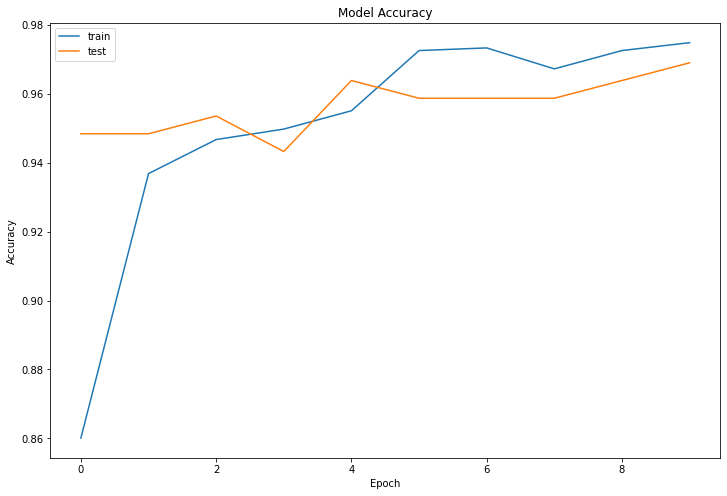

In [7]:
plt.figure(figsize = (12, 8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

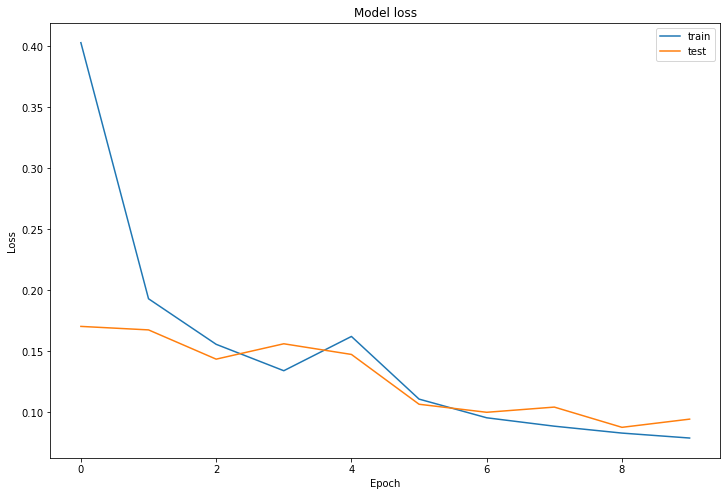

In [8]:
plt.figure(figsize = (12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In this project, we have developed a deep learning model for face mask detection using Python, Keras, and OpenCV. We developed the face mask detector model for detecting whether person is wearing a mask or not. We have trained the model using Keras with network architecture. Training the model is the first part of this project and testing using webcam using OpenCV is the second part.